# JSC370 - Hello JSC370


## Lab 0 Workflow

1. During the first hour of the lab develop a plan for how you will approach each question below. 


2. During the second half of the lab give a brief 3-5 minute presentation on how you will answer each of the questions below.


## Instructions

- Due date: Jan. 21, 17:00.


- Make a copy of this notebook.


- The notebook should be named: `jsc370_tut0_answers_lastname_studentnumber.ipynb`, where `lastname` is your last name, and `studentnumber` is your UofT student number.


- Answer each questions in a separate cell. Indicate what question you are answering.  Markdown and code cells have been started for you below. Leave the initial comment in the code cell and heading (indicated by # Answer for qustion XX). For example, place your code for Question 1 in the code cell with comment # Enter your answer for Question 1 into this cell (remember not to delete this comment).


- Make sure that you explain your solutions when asked and comment your code.


- Commit and push changes of your answer notebook to your Github repository for this lab.


- Submit a pdf copy of your notebook with the answers on Quercus.  

# Assignment

The [questions](#Questions) below are based on the paper: 
 
*Charig, C. R., Webb, D. R., Payne, S. R., & Wickham, J. E. (1986). Comparison of treatment of renal calculi by open surgery, percutaneous nephrolithotomy, and extracorporeal shockwave lithotripsy. Br Med J (Clin Res Ed), 292(6524), 879-882.*

The paper is included in the Github repository.



# Questions

Use the Charig et al. paper to answer the following questions.  

0. Is this an observational study or experiment?  Briefly explain. (see this [reference](http://propensityscoreanalysis.pbworks.com/f/BehStatObserv.study.rosenbaum05.pdf) for a discussion of the two types of studies)

<mark>**Ignore the ESWL group in all the questions below.  In other words, all the questions below relate to the percutaneous nephrolithotomy, and open surgery subjects in the study.**</mark>


1.  Use Python or R to write **functions** that can simulate this study's data set by returning a Pandas data frame/R data frame, with appropriate labels for columns and rows.  It should contain information on patients that received open stone removal and percutaneous removal.  In particular the data set should contain the type of procedure, the outcome of the procedure, and the size of the kidney stone.  


2. Calculate two-way contingency tables of success versus procedure: 

    - among all patients; 

    - patients with a stone size $\le 2cm$; and 

    - patients with a stone size $> 2cm$.  

   What do you observe?



3. Briefly explain why kidney stone size is a confounding variable.


4. Fit two logistic regression models to predict outcome: (A) with only procedure as a covariate/feature; and (B) with procedure and size as covariates/features.  Which model gives a more accurate estimate of the odds ratio of success in open versus percutaneous?  Briefly explain.

5. Construct an ROC curve for the model in 4. What is the accuracy of the model(s) in 4.?  What do you observe?



6.  The ["Objective of stratification is to fix the level of the confounders and produce groups within which the confounder does not vary. Then evaluate the exposure-outcome association within each stratum of the confounder. So within each stratum, the confounder cannot confound because it does not vary across the exposure-outcome."](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/) Calculate the common/pooled odds-ratio (sometimes called the Mantel Haenszel odds ratio) of success in open versus percutaneous.  Does a stratified analysis seem appropriate in this case?  Compare the stratified analysis to the models in 4?    


7. Is the odds ratio of success similar to the [relative risk](https://www.ncbi.nlm.nih.gov/books/NBK430824/) of success in this case (i.e., open vs. percutaneous)? Briefly, explain why it's the same or different? 



8. Which procedure (open or percutaneous) is more effective?  Explain your reasoning.

# Question 0

This is an observational study because the treatment on the patients are not randomly assigned. The surgeons and patients must chose the method of treatment. It cannot be an experiment as choosing methods from random for each patient is not ethical and can be harmful. 

# Question 1

In [11]:
import numpy as np
import pandas as pd

# answer for question 1
def generate_dataset(table_1, table_2):
    """ table_1 will be a dataframe representing Table 1; 
        table_2 will be a dataframe representing Table 2
    """
    g1_num = sum(table_1.iloc[:, 1])
    g2_num = sum(table_1.iloc[:, 2])
    g1_success = sum(table_2.iloc[:, 1])
    g2_success = sum(table_2.iloc[:, 2])
    g1_open = g1_num - table_1.iloc[-1, 1]

    g1_open = g1_num - table_1.iloc[-1, 1]
    g2_open = g2_num - table_1.iloc[-1, 2]

    group = [1] * g1_num + [2] * g2_num
    success = ['success'] * g1_success + ['fail'] * (g1_num - g1_success) + ['success'] * g2_success + ['fail'] * (g2_num - g2_success)
    p_type = []
    p_type += ['OP'] * table_2.iloc[0, 1] + ['PN'] * table_2.iloc[1, 1]
    p_type += ['OP'] * (g1_open - table_2.iloc[0, 1]) + ['PN'] * (table_1.iloc[-1, 1] - table_2.iloc[1, 1])
    p_type += ['OP'] * table_2.iloc[0, 2] + ['PN'] * table_2.iloc[1, 2]
    p_type += ['OP'] * (g2_open - table_2.iloc[0, 2]) + ['PN'] * (table_1.iloc[-1, 2] - table_2.iloc[1, 2])
    return pd.DataFrame({
        'group': group,
        'outcome': success,
        'procedure': p_type
    })


table_1 = pd.DataFrame({
    'type': ['Nephrolithotomy/pyelolithotomy', 'Pyelolithotomy', 'Ureterolithotomy', 'Percutaneous nephrolithotomy'],
    'group1': [13, 31, 43, 270],
    'group2': [218, 45, 0, 80]
})

table_2 = pd.DataFrame({
    'type': ['open procedures', 'Percutaneous nephrolithotomy'],
    'group1': [81, 234],
    'group2': [192, 55]
})

# display(table_1, table_2)
df= generate_dataset(table_1, table_2)
display(df)

,group,outcome,procedure
0,1,success,OP
1,1,success,OP
2,1,success,OP
3,1,success,OP
4,1,success,OP
...,...,...,...
695,2,fail,PN
696,2,fail,PN
697,2,fail,PN
698,2,fail,PN


# Question 2

## Among all patients

In [16]:
display(pd.crosstab(df['outcome'], df['procedure'], margins=True))

procedure,OP,PN,All
outcome,,,
fail,77,61,138
success,273,289,562
All,350,350,700


## patients with stones less than 2cm

In [14]:
df_1 = df.loc[df.group == 1]
display(pd.crosstab(df_1['outcome'], df_1['procedure'], margins=True),)

procedure,OP,PN,All
outcome,,,
fail,6,36,42
success,81,234,315
All,87,270,357


## patients with stones greater or equal to 2cm

In [15]:
df_2 = df.loc[df.group == 2]
display(pd.crosstab(df_2['outcome'], df_2['procedure'], margins=True))

procedure,OP,PN,All
outcome,,,
fail,71,25,96
success,192,55,247
All,263,80,343


## Observation 
Although the total number of patients under open procedure and percutaneous nephrolithotomy are the same. Most patients with small stones (group 1) are treated with percutaneous nephrolithotomy, while most patients with large stones (group2) are treated with open surgery procedure.  
Also, notice that open procedure out-performs percutaneous nephrolithotomy in both groups. However, percutaneous nephrolithotomy have a higher overall success rate when we combine the groups together. 

# Question 3

First, from the observation above we noticed the Simpson's paradox happening to our data. This is an indication of the existence of a confounding variable. 

Also, note that stone size have impact on both the outcome and the chosen procedure. Specifically, success rate are much lower for large size stones and the choice of procedure are highly dependent on the stone size. Since the stone size influenced both variables, it is by definition a confounding variable. 

# Question 4

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
df['outcome'] = df['outcome'] == 'success'
m1 = smf.glm(formula='outcome ~ procedure', 
             data=df, 
             family=sm.families.Binomial()).fit()
display(m1.summary())

m2 = smf.glm(formula='outcome ~ procedure + C(group)', 
             data=df, 
             family=sm.families.Binomial()).fit()
display(m2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                          
===============================================================================================
Dep. Variable:     ['outcome[False]', 'outcome[True]']   No. Observations:                  700
Model:                                             GLM   Df Residuals:                      698
Model Family:                                 Binomial   Df Model:                            1
Link Function:                                   logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -346.33
Date:                                 Tue, 14 Jan 2020   Deviance:                       692.67
Time:                                         19:02:05   Pearson chi2:                     700.
No. Iterations:                                      4                                         
Covariance Type:                             nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2657      0.129     -9.809      0.000      -1.519      -1.013
procedure[T.PN]    -0.2899      0.191     -1.517      0.129      -0.664       0.085
===================================================================================
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                          
===============================================================================================
Dep. Variable:     ['outcome[False]', 'outcome[True]']   No. Observations:                  700
Model:                                             GLM   Df Residuals:                      697
Model Family:                                 Binomial   Df Model:                            2
Link Function:                                   logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -331.43
Date:                                 Tue, 14 Jan 2020   Deviance:                       662.87
Time:                                         19:02:05   Pearson chi2:                     696.
No. Iterations:                                      5                                         
Covariance Type:                             nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2938      0.247     -9.289      0.000      -2.778      -1.810
procedure[T.PN]     0.3572      0.229      1.559      0.119      -0.092       0.806
C(group)[T.2]       1.2606      0.239      5.274      0.000       0.792       1.729
===================================================================================
"""

Model 2 (model with the size feature) is better, the likelihood for model 2 is higher than model 1. 

# Question 5

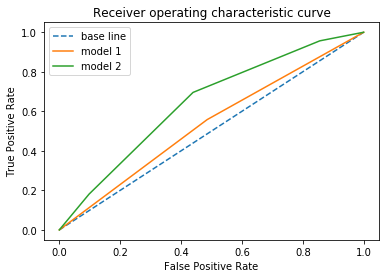

In [10]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

p1 = m1.predict(df)
p2 = m2.predict(df)
t = df['outcome']

plt.plot([0, 1], [0, 1], ls='--', label="base line")
fpr, tpr, _ = roc_curve(t, p1)
plt.plot(tpr, fpr, label="model 1")
fpr, tpr, _ = roc_curve(t, p2)
plt.plot(tpr, fpr, label="model 2")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend();

In [19]:
from statsmodels.stats.contingency_tables import StratifiedTable
# https://www.statsmodels.org/dev/generated/statsmodels.stats.contingency_tables.StratifiedTable.html
# StratifiedTable();
# oddsratio_pooled